In [2]:
import pandas as pd
import numpy as np

## Leitura do arquivo CSV para começo do tratamento de dados

In [4]:
df_obesity = pd.read_csv("obesity_cleaned.csv")
df_obesity.head()

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male


In [5]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24570 non-null  int64 
 1   Country      24570 non-null  object
 2   Year         24570 non-null  int64 
 3   Obesity (%)  24570 non-null  object
 4   Sex          24570 non-null  object
dtypes: int64(2), object(3)
memory usage: 959.9+ KB


## Aqui vamos começar a limpeza dos dados.

In [7]:
#retirando a coluna unnamed que é basicamente um índice duplicado
del df_obesity["Unnamed: 0"]

In [8]:
#separando a resposta da margem de erro. Não utilizaremos a margem de erro
df_obesity['Obesity'] = df_obesity['Obesity (%)'].str.extract(r'(\d+\.\d+)')
df_obesity

,Country,Year,Obesity (%),Sex,Obesity
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes,0.5
1,Afghanistan,1975,0.2 [0.0-0.6],Male,0.2
2,Afghanistan,1975,0.8 [0.2-2.0],Female,0.8
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes,0.5
4,Afghanistan,1976,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male,4.5
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female,24.8
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes,15.5
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male,4.7


In [9]:
#deletando a coluna original que mantinha a margem de erro. 
del df_obesity["Obesity (%)"]

In [10]:
#Como nosso único dado útil é a taxa percentual de obesidade, vamos retirar as linhas vazias.
df_obesity["Obesity"] = df_obesity["Obesity"].astype(float)

In [11]:
#conferindo os valores nulos e dropando-os 
df_obesity["Year"].isnull().sum()

0

In [12]:
df_obesity = df_obesity.dropna()

In [13]:
# nova conferencia dos valores nulos
df_obesity["Obesity"].isnull().sum()

0

In [27]:
df_obesity.head()

,Country,Year,Sex,Obesity
0,Afghanistan,1975,Both sexes,0.5
1,Afghanistan,1975,Male,0.2
2,Afghanistan,1975,Female,0.8
3,Afghanistan,1976,Both sexes,0.5
4,Afghanistan,1976,Male,0.2


In [38]:
#Vendo a média de obesidade por sexo no ano de 2015
df_obesity[df_obesity["Year"] == 2015].groupby("Sex")["Obesity"].mean()

Sex
Both sexes    19.508377
Female        22.899476
Male          15.980628
Name: Obesity, dtype: float64

In [40]:
#criando data frames para visualizar o aumento da taxa de obesidade do começo ao fim do período
df_obesity_start = df_obesity[df_obesity["Year"] == 1975]
df_obesity_end = df_obesity[df_obesity["Year"] == 2016]

In [42]:
df_obesity_start.set_index("Country", inplace=True)
df_obesity_end.set_index("Country", inplace=True)

In [48]:
df_obesity_evo = df_obesity_end[df_obesity_end["Sex"] == "Both sexes"]["Obesity"] - df_obesity_start[df_obesity_end["Sex"] == "Both sexes"]["Obesity"]

In [54]:
#os países que menos cresceram o percentil de obesidade
df_obesity_evo.sort_values().head()

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [56]:
#os países que mais cresceram o percentil de obesidade
df_obesity_evo.sort_values().tail()

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

In [62]:
#vendo a maior taxa de obesidade no ano de 2015
df_2015 = df_obesity[df_obesity["Year"] == 2015]
df_2015[df_2015["Obesity"] == df_2015["Obesity"].max()]

,Country,Year,Sex,Obesity
15116,Nauru,2015,Female,63.1


In [78]:
#criando um data frame com as informações referentes apenas ao brasil
df_brazil = df_obesity[df_obesity["Country"] == "Brazil"]
df_brazil.set_index("Year", inplace=True)

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Year'>

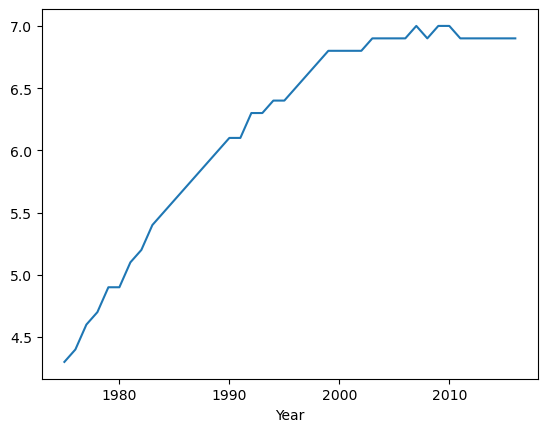

In [84]:
#plotando um gráfico mostrando a diferença de obesidade por sexo ao longo dos anos no brasil
(df_brazil[df_brazil["Sex"] == "Female"]["Obesity"] - df_brazil[df_brazil["Sex"] == "Male"]["Obesity"]).plot()

<Axes: xlabel='Year'>

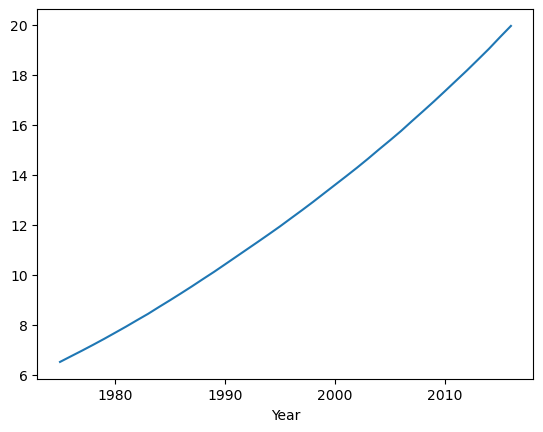

In [92]:
#visualizando o crescimento da obesidade para ambos os sexos ao decorrer dos anos.
df_obesity[df_obesity["Sex"] == "Both sexes"].groupby("Year")["Obesity"].mean().plot()